## Road Accident EDA

# Road Safety Analysis:Urban Accident Data
## Project Overview:
Road accidents represent a critical public health and safety concern, with each incident potentially offering insights into preventable risks and systemic challenges in urban transportation. This Exploratory Data Analysis (EDA) project delves into a comprehensive dataset documenting road accidents that occurred during 2021-22, aiming to uncover patterns, risk factors, and potential strategies for enhancing road safety.

In [3]:
#Importing the required hte lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
df = pd.read_csv('Road Accident Data.csv')
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In the data, most of the columns are of the 'Object' datatype so have to change the datatypes according to the columns

In [6]:
#Checking the null values
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Carriageway_Hazards           0.982388
Weather_Conditions            0.019667
Road_Type                     0.004981
Road_Surface_Conditions       0.001029
Time                          0.000055
Accident_Index                0.000000
Number_of_Casualties          0.000000
Urban_or_Rural_Area           0.000000
Speed_limit                   0.000000
Police_Force                  0.000000
Number_of_Vehicles            0.000000
Longitude                     0.000000
Accident Date                 0.000000
Local_Authority_(District)    0.000000
Light_Conditions              0.000000
Latitude                      0.000000
Accident_Severity             0.000000
Junction_Detail               0.000000
Junction_Control              0.000000
Day_of_Week                   0.000000
Vehicle_Type                  0.000000
dtype: float64

Only 2 columns have major missing value compared to other columns.

In [7]:
# Filling the missing values
df['Carriageway_Hazards'] = df['Carriageway_Hazards'].fillna(df['Carriageway_Hazards'].mode()[0])
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df['Time'] = df['Time'].fillna(df['Time'].mode()[0])
df.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [8]:
df['Carriageway_Hazards'].fillna(df['Carriageway_Hazards'].mode(), inplace=True)
df['Carriageway_Hazards'].isnull().sum()

0

In [9]:
#Drop the duplicates
df[df.duplicated()]
df.drop_duplicates(inplace=True)

In [10]:
#Change the datatypes according to column
df['Accident Date']=pd.to_datetime(df['Accident Date'])
df['Time']=pd.to_datetime(df['Time'])
x = {'Latitude': float, 'Longitude':float, 'Number_of_Casualties':int, 'Number_of_Vehicles':int , 'Speed_limit':int}
df = df.astype(x)

C:\Users\Sushil\AppData\Local\Temp\ipykernel_33512\612232200.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [11]:
#Drop the unnecessary columns
df.drop('Accident_Index',axis=1, inplace=True)

<Axes: xlabel='Month_of_Accident', ylabel='count'>

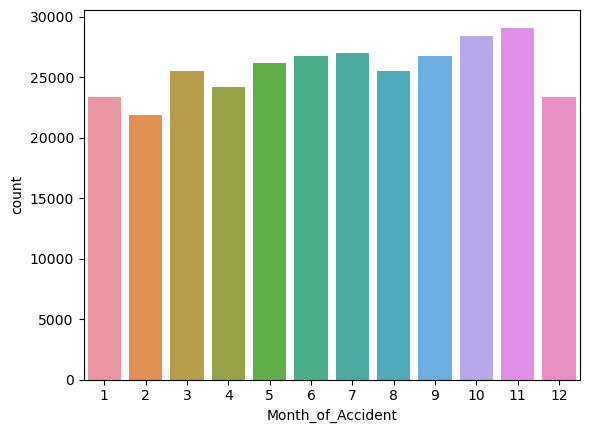

In [12]:
# Check the distribution of accidents over the month
df['Month_of_Accident'] = df['Accident Date'].dt.month
sns.countplot(df, x='Month_of_Accident',width=0.8)

<Axes: xlabel='Count', ylabel='Day_of_Week'>

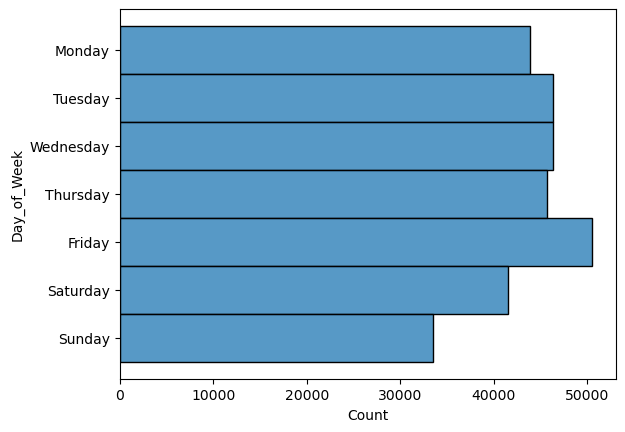

In [13]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_of_Week'] = pd.Categorical(df['Day_of_Week'], categories=day_order, ordered=True)

sns.histplot(df, y='Day_of_Week',binwidth=0.8)

<Axes: xlabel='Time', ylabel='count'>

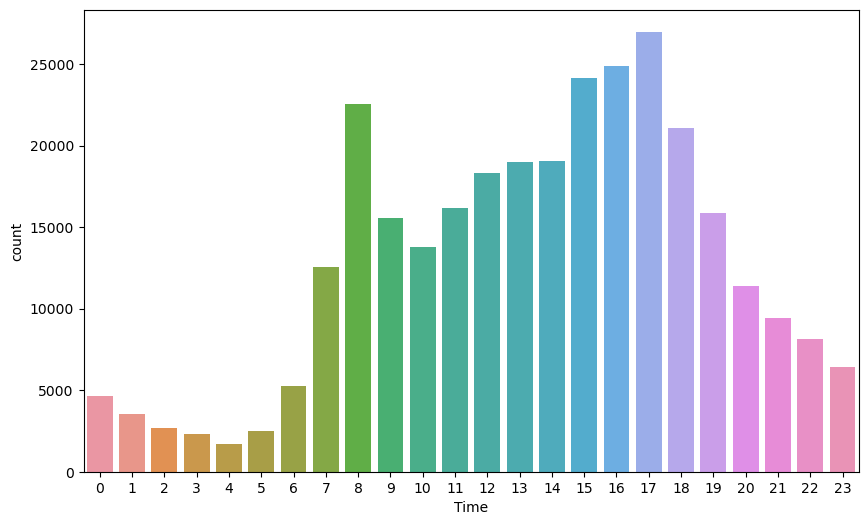

In [14]:

    # Calculate min and max values
    X= df['Time'].dt.hour
    X.value_counts()
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=X )

([<matplotlib.patches.Wedge at 0x1b40d2c3a90>,
 [Text(-0.4828249100479128, 0.9883724531962761, 'Urban'),
  Text(0.48282491004791267, -0.9883724531962762, 'Rural')],
 [Text(-0.263359041844316, 0.5391122471979687, '64.46%'),
  Text(0.26335904184431597, -0.5391122471979688, '35.54%')])

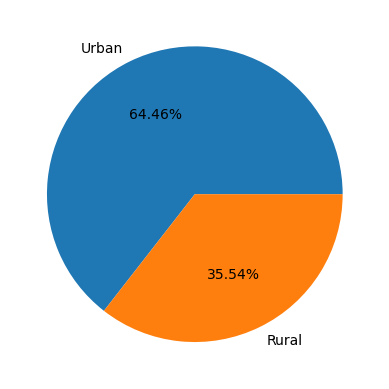

In [15]:
#Distribution of accidents according to area
area =df['Urban_or_Rural_Area'].value_counts()
plt.pie(data= df, x=area.values, labels=area.index, autopct='%1.2f%%')


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Accident_Severity_ED'] = le.fit_transform(df['Accident_Severity'])

Text(0, 0.5, 'Accident Severity')

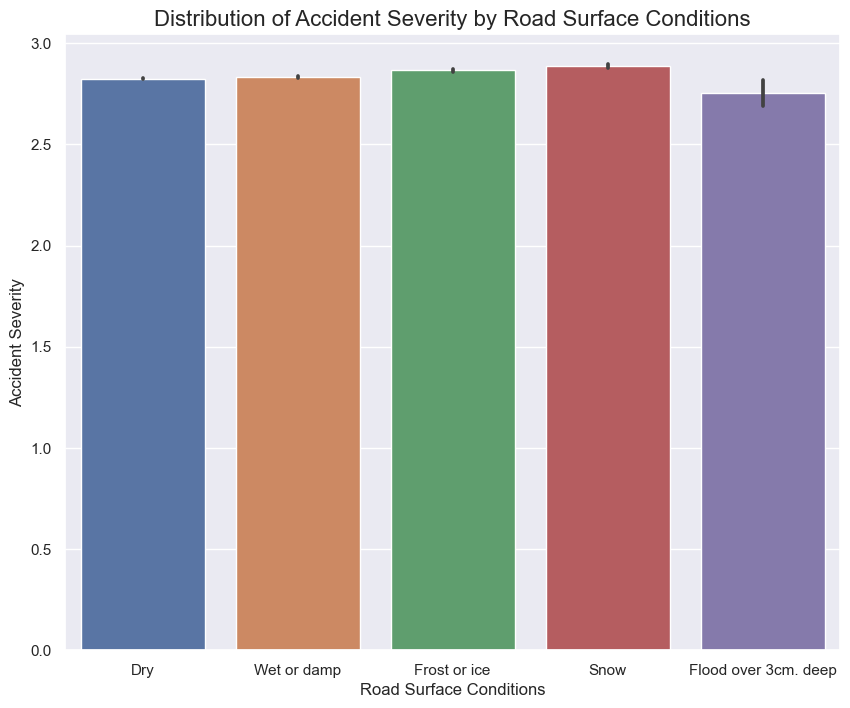

In [56]:
sns.barplot(x='Road_Surface_Conditions', y='Accident_Severity_ED', data=df)

# Add labels and title
plt.title('Distribution of Accident Severity by Road Surface Conditions', fontsize=16)
plt.xlabel('Road Surface Conditions', fontsize=12)
plt.ylabel('Accident Severity' , fontsize=12)


Almost each tyoe of road surface has same distribution of the accident severity but the flood over 3cm. deep condition has more frequency of severe or fatal accident.

In [55]:
df['Accident_Severity'].value_counts()

Accident_Severity
Slight     263279
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of types of accidents across coordinates')

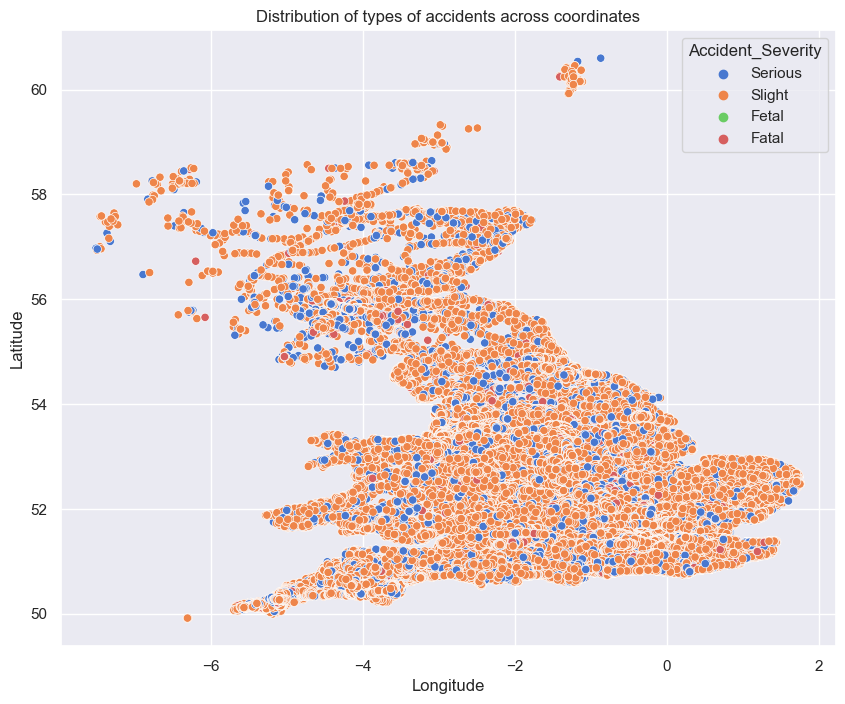

In [43]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df,x='Longitude', y='Latitude',hue='Accident_Severity',palette='muted')
ax.set_title('Distribution of types of accidents across coordinates')

Most number of accident are of slight type followed by serious accidents. The spread of accident over latitude and longitue is uniform.

In [40]:
df.columns

Index(['Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type',
       'Month_of_Accident', 'Accident_Severity_ED'],
      dtype='object')

C:\Users\Sushil\AppData\Local\Temp\ipykernel_33512\1845077023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Speed_limit'], hist=True)


<Axes: xlabel='Speed_limit', ylabel='Density'>

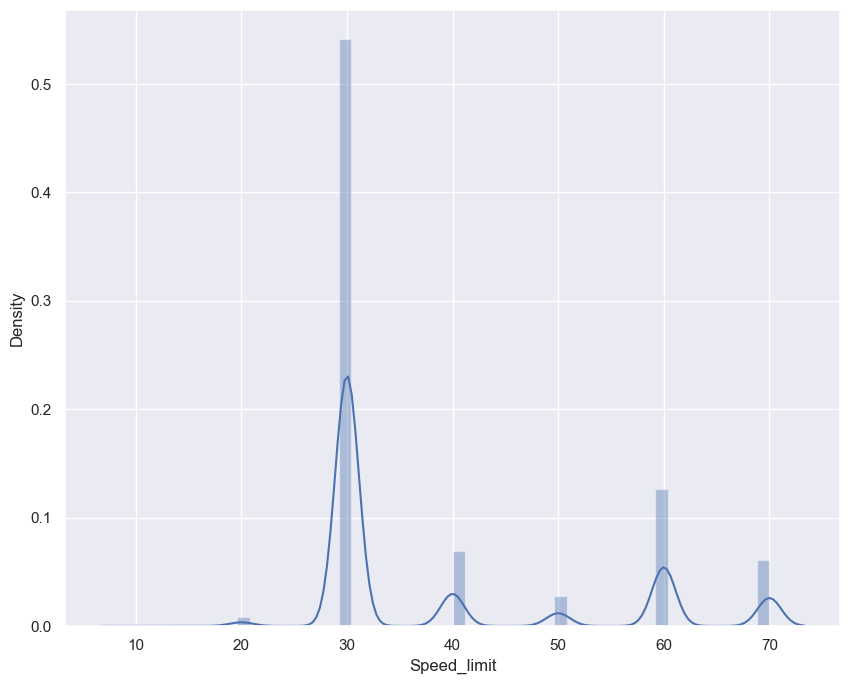

In [45]:
sns.distplot(df['Speed_limit'], hist=True)

In [46]:
#skewness and kurtosis
print("Skewness: %f" % df['Speed_limit'].skew())
print("Kurtosis: %f" % df['Speed_limit'].kurt())

Skewness: 1.142120
Kurtosis: -0.310878


Kurtosis is negative so no outliers are present but Skewness is greater than 1 so data is not normaaly distributed

Inference : Generally accident occurs at high speed but contradictally most accidents happen on the road where the speed limit was 30.


<Axes: xlabel='Road_Type', ylabel='count'>

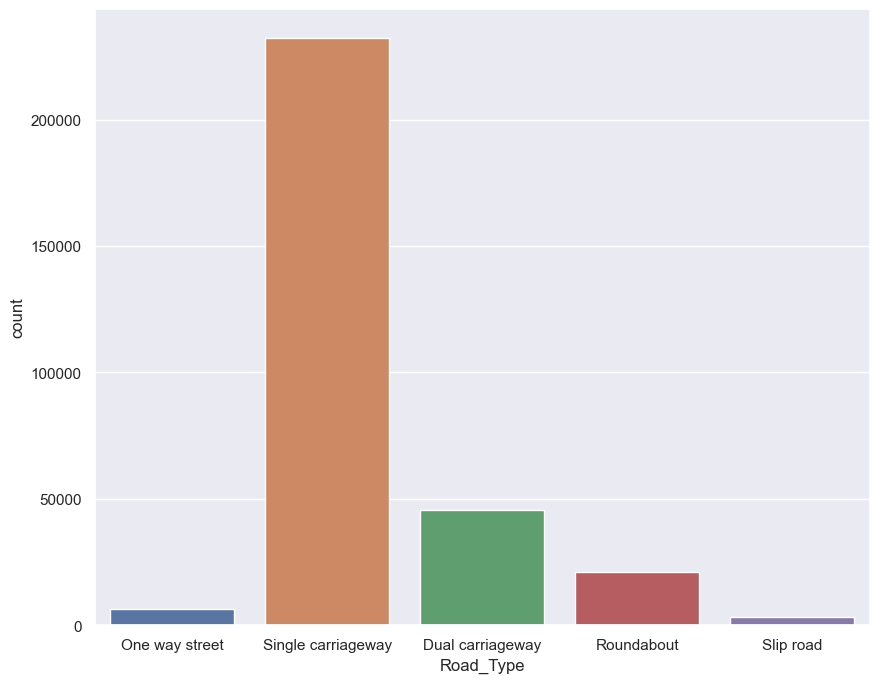

In [51]:
sns.countplot(x=df['Road_Type'])

Inference: Single carriageway is the road type on which most accidents happened and the reason is obivious!

[Text(0, 0, 'Daylight'),
 Text(1, 0, 'Darkness - lights lit'),
 Text(2, 0, 'Darkness - lighting unknown'),
 Text(3, 0, 'Darkness - lights unlit'),
 Text(4, 0, 'Darkness - no lighting')]

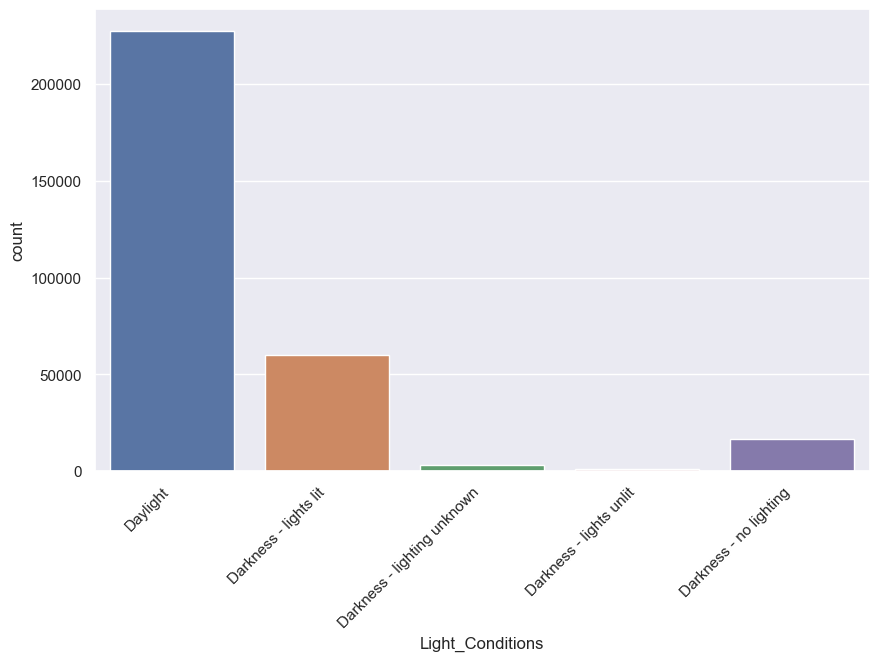

In [54]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Adjust figsize as needed

# Create the countplot
sns.countplot(x=df['Light_Conditions'], ax=axes)

# Rotate the x-axis labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

Even though there is daylight still the maxium number of accidents happen in same condition. People commuting for work go in hurry , this might be one of the reason this distrtibution

In [63]:
districts= df['Local_Authority_(District)'].value_counts().head(10)

[Text(0, 0, 'Birmingham'),
 Text(1, 0, 'Leeds'),
 Text(2, 0, 'Manchester'),
 Text(3, 0, 'Bradford'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Sheffield'),
 Text(6, 0, 'Liverpool'),
 Text(7, 0, 'Cornwall'),
 Text(8, 0, 'Barnet'),
 Text(9, 0, 'Bristol, City of')]

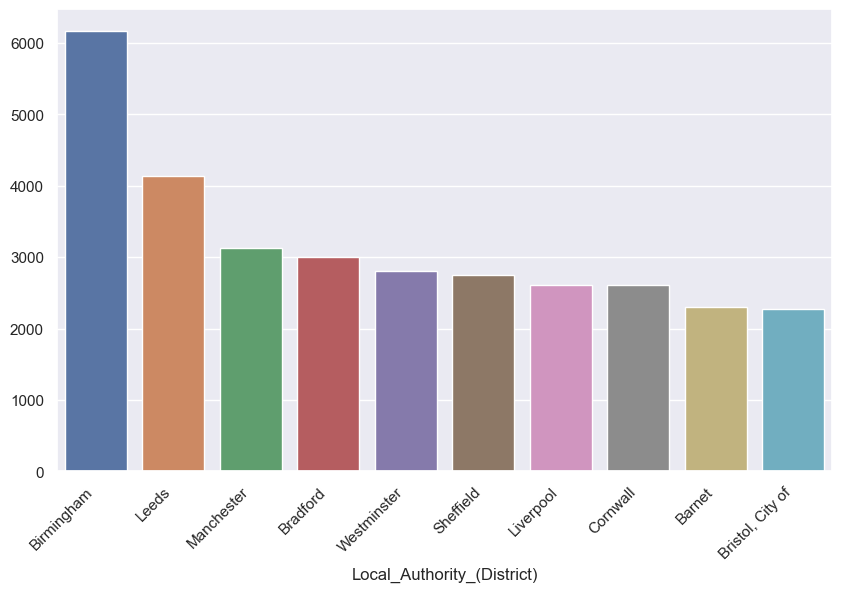

In [66]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))  # Adjust figsize as needed

# Create the countplot
sns.barplot(x=districts.index,y=districts.values, ax=axes)

# Rotate the x-axis labels
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

**Birmingham** has most number of accidents around 6000 , among districts in UK. 
The difference between 1st amd 2nd district is quite big as compared to difference between 2 succesive districts.